# Mosaico 2021

Script trabajado por Francisco Albornoz (2021-04-13) / Última modificación / Mosaicos Patagonia

2021-08-05 13:07:09 

In [1]:
import ee
import geemap
import geemap.chart as chart
import os
import folium

<img src=https://www.ecopaysen.cl/wp-content/uploads/2019/12/ecopaysen_marca_web.png>

In [2]:
Map = geemap.Map(center = [-45, -70], zoom = 4)
Map1 = geemap.Map(center = [-45, -70], zoom = 4)
Map2 = geemap.Map(center = [-45, -70], zoom = 4)
Map3 = geemap.Map(center = [-45, -70], zoom = 4)
Map4 = geemap.Map(center = [-45, -70], zoom = 4)
Map5 = geemap.Map(center = [-45, -70], zoom = 4)
Map6 = geemap.Map(center = [-45, -70], zoom = 4)
Map7 = geemap.Map(center = [-45, -70], zoom = 4)
Map8 = geemap.Map(center = [-45, -70], zoom = 4)
Map9 = geemap.Map(center = [-45, -70], zoom = 4)
Map10 = geemap.Map(center = [-45, -70], zoom = 4)
Map11 = geemap.Map(center = [-45, -70], zoom = 4)

## Área de Estudio

In [3]:
work_dir = os.path.expanduser('../../../Data/shapes/')
patagonia = os.path.join(work_dir, 'patagonia_nueva.shp')
patagonia_grande = geemap.shp_to_ee(patagonia)
base1 = os.path.join(work_dir, 'img_base.shp')
base = geemap.shp_to_ee(base1)

In [4]:
base2 = os.path.join(work_dir, 'base2.shp')
base2 = geemap.shp_to_ee(base2)
base3 = os.path.join(work_dir, 'base3.shp')
base3 = geemap.shp_to_ee(base3)
base4 = os.path.join(work_dir, 'base4.shp')
base4 = geemap.shp_to_ee(base4)
base5 = os.path.join(work_dir, 'base5.shp')
base5 = geemap.shp_to_ee(base5)
base6 = os.path.join(work_dir, 'base6.shp')
base6 = geemap.shp_to_ee(base6)

## Colors Bars

In [5]:
import geemap.colormaps as cm

In [6]:
# cm.palettes.terrain

In [7]:
color_ndvi = cm.palettes.ndvi

In [8]:
color_ndwi = cm.palettes.ndwi

In [9]:
color_terrain = cm.palettes.terrain

In [10]:
color_glaciar = cm.palettes.PuBuGn_r

In [11]:
color_nubes = cm.palettes.inferno

In [12]:
cm.list_colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

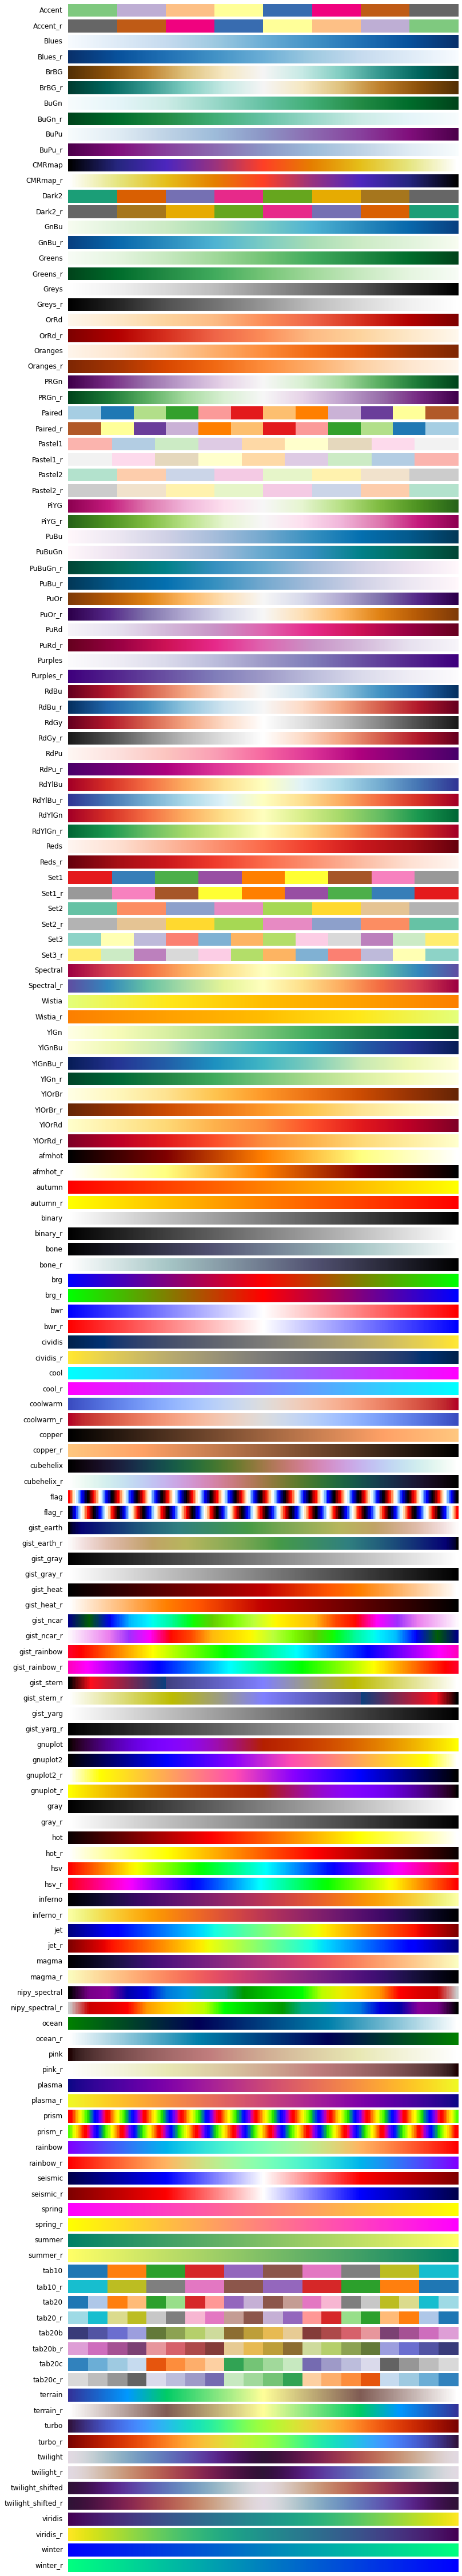

In [13]:
cm.plot_colormaps(width=12, height=0.4)

## Funciones

In [14]:
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

In [15]:
def addNDVI(image): 
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

In [16]:
def addNDWI(image):
    ndwi = image.normalizedDifference(['B3','B5']).rename('NDWI')
    return image.addBands(ndwi)

In [17]:
def addNDGI(image):
    ndgi = image.normalizedDifference(['B3','B4']).rename('NDGI')
    return image.addBands(ndgi)

In [18]:
def addSAVI(image):
    savi = image.expression(
        '((b5 - b4)/(b5 + b4 + 0.5))*1.5', {
            'b4':image.select('B4'),
            'b5':image.select('B5')
        }) 
    savi= savi.rename('SAVI')
    return image.addBands(savi)

In [19]:
def addNDSI(image):
    ndsi = image.normalizedDifference(['B3','B6']).rename('NDSI')
    return image.addBands(ndsi)

In [20]:
def addDate(image):
    img_date = ee.Date(image.date())
    img_date = ee.Number.parse(img_date.format('YYYY'))
    return image.addBands(ee.Image(img_date).rename('date').toInt())

In [21]:
def Cloud30(image):
    scored = ee.Algorithms.Landsat.simpleCloudScore(image)
    return image.updateMask(scored.select(['cloud']).lt(30)) 

In [22]:
def Cloud20(image):
    scored = ee.Algorithms.Landsat.simpleCloudScore(image)
    return image.updateMask(scored.select(['cloud']).lt(20)) 

In [23]:
def Cloud10(image):
    scored = ee.Algorithms.Landsat.simpleCloudScore(image)
    return image.updateMask(scored.select(['cloud']).lt(10))

In [24]:
def addCloud(image):
    nube = ee.Algorithms.Landsat.simpleCloudScore(image)
    return image.addBands(ee.Image(nube.select(['cloud'])).rename('nube'))

In [25]:
def find_closest(target_image, image_col, days):
    """Filter images in a collection by date proximity and spatial intersection to a target image.

    Args:
        target_image: An ee.Image whose observation date is used to find near-date images in
          the provided image_col image collection. It must have a 'system:time_start' property.
        image_col: An ee.ImageCollection to filter by date proximity and spatial intersection
          to the target_image. Each image in the collection must have a 'system:time_start'
          property.
        days: A number that defines the maximum number of days difference allowed between
          the target_image and images in the image_col.

    Returns:
        An ee.ImageCollection that has been filtered to include those images that are within the
          given date proximity to target_image and intersect it spatially.
    """

    # Compute the timespan for N days (in milliseconds).
    range = ee.Number(days).multiply(1000 * 60 * 60 * 24)

    filter = ee.Filter.And(
        ee.Filter.maxDifference(range, 'system:time_start', None, 'system:time_start'),
        ee.Filter.intersects('.geo', None, '.geo'))

    closest = (ee.Join.saveAll('matches', 'measure')
        .apply(ee.ImageCollection([target_image]), image_col, filter))

    return ee.ImageCollection(ee.List(closest.first().get('matches')))

## Colecciones

### 2021

In [26]:
start_date = '2020-10-01'
end_date = '2021-03-31'

l8_2021 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(patagonia_grande) \
    .filterDate(start_date, end_date)

In [27]:
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

In [28]:
vis_nieve = {
  'bands': ['B6', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

In [29]:
coleccion2021 = l8_2021.map(addNDVI).map(addNDWI).map(addNDGI).map(addSAVI).map(addNDSI).map(addDate).map(addCloud)

In [30]:
QM_NDVI_2021 = coleccion2021.qualityMosaic('NDVI') # Normalized difference vegetation Index
QM_NDWI_2021 = coleccion2021.qualityMosaic('NDWI') # Normalize difference water index
QM_SAVI_2021 = coleccion2021.qualityMosaic('SAVI') # Soil Adjusted Vegetation Index 
QM_NDGI_2021 = coleccion2021.qualityMosaic('NDGI') # Normalized difference glacier index
QM_NDSI_2021 = coleccion2021.qualityMosaic('NDSI') # Normalized difference snow index

In [31]:
Map.addLayer(QM_NDVI_2021, vizParams, 'QM de NDVI 2021')
Map.addLayer(QM_NDWI_2021, vizParams, 'QM de NDWI 2021')
Map.addLayer(QM_SAVI_2021, vizParams, 'QM de SAVI 2021')
Map.addLayer(QM_NDGI_2021, vis_nieve, 'QM de NDGI 2021')
Map.addLayer(QM_NDSI_2021, vis_nieve, 'QM de NDSI 2021')
# Map 

In [32]:
c2021_sn = coleccion2021.map(Cloud20)
NDVI_2021_sn = c2021_sn.qualityMosaic('NDVI')
NDWI_2021_sn = c2021_sn.qualityMosaic('NDWI')
SAVI_2021_sn = c2021_sn.qualityMosaic('SAVI')
NDGI_2021_sn = c2021_sn.qualityMosaic('NDGI')
NDSI_2021_sn = c2021_sn.qualityMosaic('NDSI')

In [33]:
Map2.addLayer(NDVI_2021_sn, vizParams, 'QMsn de NDVI 2021')
Map2.addLayer(NDWI_2021_sn, vizParams, 'QMsn de NDWI 2021')
Map2.addLayer(SAVI_2021_sn, vizParams, 'QMsn de SAVI 2021')
Map2.addLayer(NDGI_2021_sn, vis_nieve, 'QMsn de NDGI 2021')
Map2.addLayer(NDSI_2021_sn, vis_nieve, 'QMsn de NDSI 2021')
Map2

Map(center=[-45, -70], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

#### Img base

In [34]:
start_date = '2020-10-01'
end_date = '2021-03-31'
imgbase = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(base) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()


In [35]:
imgbase.propertyNames().getInfo()

['system:version',
 'system:id',
 'RADIANCE_MULT_BAND_5',
 'RADIANCE_MULT_BAND_6',
 'RADIANCE_MULT_BAND_3',
 'RADIANCE_MULT_BAND_4',
 'RADIANCE_MULT_BAND_1',
 'RADIANCE_MULT_BAND_2',
 'K2_CONSTANT_BAND_11',
 'K2_CONSTANT_BAND_10',
 'system:footprint',
 'REFLECTIVE_SAMPLES',
 'SUN_AZIMUTH',
 'CPF_NAME',
 'DATE_ACQUIRED',
 'ELLIPSOID',
 'google:registration_offset_x',
 'google:registration_offset_y',
 'STATION_ID',
 'RESAMPLING_OPTION',
 'ORIENTATION',
 'WRS_ROW',
 'RADIANCE_MULT_BAND_9',
 'TARGET_WRS_ROW',
 'RADIANCE_MULT_BAND_7',
 'RADIANCE_MULT_BAND_8',
 'IMAGE_QUALITY_TIRS',
 'TRUNCATION_OLI',
 'CLOUD_COVER',
 'GEOMETRIC_RMSE_VERIFY',
 'COLLECTION_CATEGORY',
 'GRID_CELL_SIZE_REFLECTIVE',
 'CLOUD_COVER_LAND',
 'GEOMETRIC_RMSE_MODEL',
 'COLLECTION_NUMBER',
 'IMAGE_QUALITY_OLI',
 'LANDSAT_SCENE_ID',
 'WRS_PATH',
 'google:registration_count',
 'PANCHROMATIC_SAMPLES',
 'PANCHROMATIC_LINES',
 'GEOMETRIC_RMSE_MODEL_Y',
 'REFLECTIVE_LINES',
 'TIRS_STRAY_LIGHT_CORRECTION_SOURCE',
 'GEOMETRIC_

In [36]:
imgbase.get('LANDSAT_PRODUCT_ID').getInfo()

'LC08_L1TP_231091_20210130_20210306_01_T1'

In [37]:
imgbase = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_231091_20210130')

In [38]:
Map1.addLayer(imgbase, vizParams, 'img base')
Map1

Map(center=[-45, -70], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [39]:
start_date = '2020-10-01'
end_date = '2021-03-31'
imgbase2 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(base2) \
    .filterDate(start_date, end_date) 

In [40]:
imgbase2 = find_closest(imgbase, imgbase2,14).sort('CLOUD_COVER').first()
imgbase2 = ee.Image(imgbase2)

In [41]:
# Map1.addLayer(imgbase2, vizParams, 'img base2')
# Map1

In [42]:
start_date = '2020-10-01'
end_date = '2021-03-31'
imgbase3 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(base3) \
    .filterDate(start_date, end_date) 

In [43]:
imgbase3 = find_closest(imgbase2, imgbase3,14).sort('CLOUD_COVER').first()
imgbase3 = ee.Image(imgbase3)

In [44]:
# Map1.addLayer(imgbase3, vizParams, 'img base3')
# Map1

In [45]:
start_date = '2020-10-01'
end_date = '2021-03-31'
imgbase4 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(base4) \
    .filterDate(start_date, end_date) 

In [46]:
imgbase4 = find_closest(imgbase3, imgbase4,14).sort('CLOUD_COVER').first()
imgbase4 = ee.Image(imgbase4)

In [47]:
# Map1.addLayer(imgbase4, vizParams, 'img base4')
# Map1

In [48]:
start_date = '2020-10-01'
end_date = '2021-03-31'
imgbase5 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(base5) \
    .filterDate(start_date, end_date) 

In [49]:
imgbase5 = find_closest(imgbase, imgbase5,28).sort('CLOUD_COVER').first()
imgbase5 = ee.Image(imgbase5)

In [50]:
# Map1.addLayer(imgbase5, vizParams, 'img base5')
# Map1

In [51]:
start_date = '2020-10-01'
end_date = '2021-03-31'
imgbase6 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(base6) \
    .filterDate(start_date, end_date)

In [52]:
imgbase6 = find_closest(imgbase5, imgbase6,360).sort('CLOUD_COVER').first()
imgbase6 = ee.Image(imgbase6)

In [53]:
# Map1.addLayer(imgbase6, vizParams, 'img base6')
# Map1

In [54]:
imgbase = addNDVI(imgbase)
imgbase2 = addNDVI(imgbase2)
imgbase3 = addNDVI(imgbase3)
imgbase3 = addNDVI(imgbase4)
imgbase4 = addNDVI(imgbase5)
imgbase5 = addNDVI(imgbase6)

In [55]:
imgbase = addNDWI(imgbase)
imgbase2 = addNDWI(imgbase2)
imgbase3 = addNDWI(imgbase3)
imgbase4 = addNDWI(imgbase4)
imgbase5 = addNDWI(imgbase5)
imgbase6 = addNDWI(imgbase6)

In [56]:
imgbase = addNDGI(imgbase)
imgbase2 = addNDGI(imgbase2)
imgbase3 = addNDGI(imgbase3)
imgbase4 = addNDGI(imgbase4)
imgbase5 = addNDGI(imgbase5)
imgbase6 = addNDGI(imgbase6)

In [57]:
imgbase = addSAVI(imgbase)
imgbase2 = addSAVI(imgbase2)
imgbase3 = addSAVI(imgbase3)
imgbase4 = addSAVI(imgbase4)
imgbase5 = addSAVI(imgbase5)
imgbase6 = addSAVI(imgbase6)

In [58]:
imgbase = addNDSI(imgbase)
imgbase2 = addNDSI(imgbase2)
imgbase3 = addNDSI(imgbase3)
imgbase4 = addNDSI(imgbase4)
imgbase5 = addNDSI(imgbase5)
imgbase6 = addNDSI(imgbase6)

In [59]:
imgbase = addDate(imgbase)
imgbase2 = addDate(imgbase2)
imgbase3 = addDate(imgbase3)
imgbase4 = addDate(imgbase4)
imgbase5 = addDate(imgbase5)
imgbase6 = addDate(imgbase6)

In [60]:
imgbase = addCloud(imgbase)
imgbase2 = addCloud(imgbase2)
imgbase3 = addCloud(imgbase3)
imgbase4 = addCloud(imgbase4)
imgbase5 = addCloud(imgbase5)
imgbase6 = addCloud(imgbase6)

In [61]:
imgbase.get('DATE_ACQUIRED').getInfo()

'2021-01-30'

In [62]:
imgbase2.get('DATE_ACQUIRED').getInfo()

'2021-02-08'

In [63]:
imgbase3.get('DATE_ACQUIRED').getInfo()

'2021-02-10'

In [64]:
imgbase4.get('DATE_ACQUIRED').getInfo()

'2021-01-05'

In [65]:
imgbase5.get('DATE_ACQUIRED').getInfo()

'2021-03-17'

In [66]:
imgbase6.get('DATE_ACQUIRED').getInfo()

'2021-03-17'

In [67]:
imgbase_bandas = imgbase.select(['B1','B2','B3','B4','B5','B6','B7'])
imgbase_bandas2 = imgbase2.select(['B1','B2','B3','B4','B5','B6','B7'])
imgbase_bandas3 = imgbase3.select(['B1','B2','B3','B4','B5','B6','B7'])
imgbase_bandas4 = imgbase4.select(['B1','B2','B3','B4','B5','B6','B7'])
imgbase_bandas5 = imgbase5.select(['B1','B2','B3','B4','B5','B6','B7'])
imgbase_bandas6 = imgbase6.select(['B1','B2','B3','B4','B5','B6','B7'])

In [68]:
colec_base = ee.ImageCollection([imgbase,imgbase2,imgbase3,imgbase4,imgbase5,imgbase6]).mosaic()

In [69]:
Map1.addLayer(imgbase_bandas, vizParams, 'img base')
Map1.addLayer(imgbase_bandas2, vizParams, 'img base2')
Map1.addLayer(imgbase_bandas3, vizParams, 'img base3')
Map1.addLayer(imgbase_bandas4, vizParams, 'img base4')
Map1.addLayer(imgbase_bandas5, vizParams, 'img base5')
Map1.addLayer(imgbase_bandas6, vizParams, 'img base6')
Map1.addLayer(colec_base, vizParams, 'coleccion')
Map1

Map(center=[-45, -70], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### 2020

In [ ]:
start_date = '2019-10-01'
end_date = '2020-03-31'

l8_2020 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(patagonia_grande) \
    .filterDate(start_date, end_date)

In [ ]:
coleccion2020 = l8_2020.map(addNDVI).map(addNDWI).map(addNDGI).map(addSAVI).map(addNDSI).map(addDate).map(addCloud)

In [ ]:
QM_NDVI_2020 = coleccion2020.qualityMosaic('NDVI') # Normalized difference vegetation Index
QM_NDWI_2020 = coleccion2020.qualityMosaic('NDWI') # Normalize difference water index
QM_SAVI_2020 = coleccion2020.qualityMosaic('SAVI') # Soil Adjusted Vegetation Index 
QM_NDGI_2020 = coleccion2020.qualityMosaic('NDGI') # Normalized difference glacier index
QM_NDSI_2020 = coleccion2020.qualityMosaic('NDSI') # Normalized difference snow index

In [ ]:
Map.addLayer(QM_NDVI_2020, vizParams, 'QM de NDVI 2020')
Map.addLayer(QM_NDWI_2020, vizParams, 'QM de NDWI 2020')
Map.addLayer(QM_SAVI_2020, vizParams, 'QM de SAVI 2020')
Map.addLayer(QM_NDGI_2020, vis_nieve, 'QM de NDGI 2020')
Map.addLayer(QM_NDSI_2020, vis_nieve, 'QM de NDSI 2020')
# Map

In [ ]:
c2020_sn = coleccion2020.map(Cloud20)
NDVI_2020_sn = c2020_sn.qualityMosaic('NDVI')
NDWI_2020_sn = c2020_sn.qualityMosaic('NDWI')
SAVI_2020_sn = c2020_sn.qualityMosaic('SAVI')
NDGI_2020_sn = c2020_sn.qualityMosaic('NDGI')
NDSI_2020_sn = c2020_sn.qualityMosaic('NDSI')

In [ ]:
Map2.addLayer(NDVI_2020_sn, vizParams, 'QMsn de NDVI 2020')
Map2.addLayer(NDWI_2020_sn, vizParams, 'QMsn de NDWI 2020')
Map2.addLayer(SAVI_2020_sn, vizParams, 'QMsn de SAVI 2020')
Map2.addLayer(NDGI_2020_sn, vis_nieve, 'QMsn de NDGI 2020')
Map2.addLayer(NDSI_2020_sn, vis_nieve, 'QMsn de NDSI 2020')
# Map2

### 2019

In [ ]:
start_date = '2018-10-01'
end_date = '2019-03-31'

l8_2019 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(patagonia_grande) \
    .filterDate(start_date, end_date)

In [ ]:
coleccion2019 = l8_2019.map(addNDVI).map(addNDWI).map(addNDGI).map(addSAVI).map(addNDSI).map(addDate).map(addCloud)

In [ ]:
QM_NDVI_2019 = coleccion2019.qualityMosaic('NDVI') # Normalized difference vegetation Index
QM_NDWI_2019 = coleccion2019.qualityMosaic('NDWI') # Normalize difference water index
QM_SAVI_2019 = coleccion2019.qualityMosaic('SAVI') # Soil Adjusted Vegetation Index 
QM_NDGI_2019 = coleccion2019.qualityMosaic('NDGI') # Normalized difference glacier index
QM_NDSI_2019 = coleccion2019.qualityMosaic('NDSI') # Normalized difference snow index

In [ ]:
Map3.addLayer(QM_NDVI_2019, vizParams, 'QM de NDVI 2019')
Map3.addLayer(QM_NDWI_2019, vizParams, 'QM de NDWI 2019')
Map3.addLayer(QM_SAVI_2019, vizParams, 'QM de SAVI 2019')
Map3.addLayer(QM_NDGI_2019, vis_nieve, 'QM de NDGI 2019')
Map3.addLayer(QM_NDSI_2019, vis_nieve, 'QM de NDSI 2019')
# Map3

In [ ]:
c2019_sn = coleccion2019.map(Cloud20)
NDVI_2019_sn = c2019_sn.qualityMosaic('NDVI')
NDWI_2019_sn = c2019_sn.qualityMosaic('NDWI')
SAVI_2019_sn = c2019_sn.qualityMosaic('SAVI')
NDGI_2019_sn = c2019_sn.qualityMosaic('NDGI')
NDSI_2019_sn = c2019_sn.qualityMosaic('NDSI')

In [ ]:
Map4.addLayer(NDVI_2019_sn, vizParams, 'QMsn de NDVI 2019')
Map4.addLayer(NDWI_2019_sn, vizParams, 'QMsn de NDWI 2019')
Map4.addLayer(SAVI_2019_sn, vizParams, 'QMsn de SAVI 2019')
Map4.addLayer(NDGI_2019_sn, vis_nieve, 'QMsn de NDGI 2019')
Map4.addLayer(NDSI_2019_sn, vis_nieve, 'QMsn de NDSI 2019')
# Map4

### 2018

In [ ]:
start_date = '2017-10-01'
end_date = '2018-03-31'

l8_2018 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(patagonia_grande) \
    .filterDate(start_date, end_date)

In [ ]:
coleccion2018 = l8_2018.map(addNDVI).map(addNDWI).map(addNDGI).map(addSAVI).map(addNDSI).map(addDate).map(addCloud)

In [ ]:
QM_NDVI_2018 = coleccion2018.qualityMosaic('NDVI') # Normalized difference vegetation Index
QM_NDWI_2018 = coleccion2018.qualityMosaic('NDWI') # Normalize difference water index
QM_SAVI_2018 = coleccion2018.qualityMosaic('SAVI') # Soil Adjusted Vegetation Index 
QM_NDGI_2018 = coleccion2018.qualityMosaic('NDGI') # Normalized difference glacier index
QM_NDSI_2018 = coleccion2018.qualityMosaic('NDSI') # Normalized difference snow index

In [ ]:
Map3.addLayer(QM_NDVI_2018, vizParams, 'QM de NDVI 2018')
Map3.addLayer(QM_NDWI_2018, vizParams, 'QM de NDWI 2018')
Map3.addLayer(QM_SAVI_2018, vizParams, 'QM de SAVI 2018')
Map3.addLayer(QM_NDGI_2018, vis_nieve, 'QM de NDGI 2018')
Map3.addLayer(QM_NDSI_2018, vis_nieve, 'QM de NDSI 2018')
# Map3

In [ ]:
c2018_sn = coleccion2018.map(Cloud20)
NDVI_2018_sn = c2018_sn.qualityMosaic('NDVI')
NDWI_2018_sn = c2018_sn.qualityMosaic('NDWI')
SAVI_2018_sn = c2018_sn.qualityMosaic('SAVI')
NDGI_2018_sn = c2018_sn.qualityMosaic('NDGI')
NDSI_2018_sn = c2018_sn.qualityMosaic('NDSI')

In [ ]:
Map4.addLayer(NDVI_2018_sn, vizParams, 'QMsn de NDVI 2018')
Map4.addLayer(NDWI_2018_sn, vizParams, 'QMsn de NDWI 2018')
Map4.addLayer(SAVI_2018_sn, vizParams, 'QMsn de SAVI 2018')
Map4.addLayer(NDGI_2018_sn, vis_nieve, 'QMsn de NDGI 2018')
Map4.addLayer(NDSI_2018_sn, vis_nieve, 'QMsn de NDSI 2018')
# Map4

### 2017

In [ ]:
start_date = '2016-10-01'
end_date = '2017-03-31'

l8_2017 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(patagonia_grande) \
    .filterDate(start_date, end_date)

In [ ]:
coleccion2017 = l8_2017.map(addNDVI).map(addNDWI).map(addNDGI).map(addSAVI).map(addNDSI).map(addDate).map(addCloud)

In [ ]:
QM_NDVI_2017 = coleccion2017.qualityMosaic('NDVI') # Normalized difference vegetation Index
QM_NDWI_2017 = coleccion2017.qualityMosaic('NDWI') # Normalize difference water index
QM_SAVI_2017 = coleccion2017.qualityMosaic('SAVI') # Soil Adjusted Vegetation Index 
QM_NDGI_2017 = coleccion2017.qualityMosaic('NDGI') # Normalized difference glacier index
QM_NDSI_2017 = coleccion2017.qualityMosaic('NDSI') # Normalized difference snow index

In [ ]:
Map7.addLayer(QM_NDVI_2017, vizParams, 'QM de NDVI 2017')
Map7.addLayer(QM_NDWI_2017, vizParams, 'QM de NDWI 2017')
Map7.addLayer(QM_SAVI_2017, vizParams, 'QM de SAVI 2017')
Map7.addLayer(QM_NDGI_2017, vis_nieve, 'QM de NDGI 2017')
Map7.addLayer(QM_NDSI_2017, vis_nieve, 'QM de NDSI 2017')
# Map7

In [ ]:
c2017_sn = coleccion2017.map(Cloud20)
NDVI_2017_sn = c2017_sn.qualityMosaic('NDVI')
NDWI_2017_sn = c2017_sn.qualityMosaic('NDWI')
SAVI_2017_sn = c2017_sn.qualityMosaic('SAVI')
NDGI_2017_sn = c2017_sn.qualityMosaic('NDGI')
NDSI_2017_sn = c2017_sn.qualityMosaic('NDSI')

In [ ]:
Map8.addLayer(NDVI_2017_sn, vizParams, 'QMsn de NDVI 2017')
Map8.addLayer(NDWI_2017_sn, vizParams, 'QMsn de NDWI 2017')
Map8.addLayer(SAVI_2017_sn, vizParams, 'QMsn de SAVI 2017')
Map8.addLayer(NDGI_2017_sn, vis_nieve, 'QMsn de NDGI 2017')
Map8.addLayer(NDSI_2017_sn, vis_nieve, 'QMsn de NDSI 2017')
# Map8

#### Colección agua 2019-2021

In [ ]:
start_date = '2018-10-01'
end_date = '2021-03-31'

l8_2021_sur = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(patagonia_grande) \
    .filterDate(start_date, end_date)

In [ ]:
coleccion2021_sur = l8_2021_sur.map(addNDVI).map(addNDWI).map(addNDGI).map(addSAVI).map(addNDSI).map(addDate).map(addCloud)

In [ ]:
QM_NDVI_2021_sur = coleccion2021_sur.qualityMosaic('NDVI') # Normalized difference vegetation Index
QM_NDWI_2021_sur = coleccion2021_sur.qualityMosaic('NDWI') # Normalize difference water index
QM_SAVI_2021_sur = coleccion2021_sur.qualityMosaic('SAVI') # Soil Adjusted Vegetation Index 
QM_NDGI_2021_sur = coleccion2021_sur.qualityMosaic('NDGI') # Normalized difference glacier index
QM_NDSI_2021_sur = coleccion2021_sur.qualityMosaic('NDSI') # Normalized difference snow index

In [ ]:
c2021_sur_sn = coleccion2021_sur.map(Cloud20)
NDVI_2021_sur_sn = c2021_sur_sn.qualityMosaic('NDVI')
NDWI_2021_sur_sn = c2021_sur_sn.qualityMosaic('NDWI')
SAVI_2021_sur_sn = c2021_sur_sn.qualityMosaic('SAVI')
NDGI_2021_sur_sn = c2021_sur_sn.qualityMosaic('NDGI')
NDSI_2021_sur_sn = c2021_sur_sn.qualityMosaic('NDSI')

## Indices por colección

### Índices 2021

In [ ]:
NDVI_2021 = NDVI_2021_sn.select('NDVI')
NDWI_2021 = NDWI_2021_sn.select('NDWI')
SAVI_2021 = SAVI_2021_sn.select('SAVI')
NDGI_2021 = NDGI_2021_sn.select('NDGI')
NDSI_2021 = NDSI_2021_sn.select('NDSI')

In [ ]:
Map9.addLayer(NDVI_2021, {'palette': color_terrain}, 'QMsn de NDVI 2021')
Map9.addLayer(NDWI_2021, {'palette': color_ndwi}, 'QMsn de NDWI 2021')
Map9.addLayer(SAVI_2021, {'palette': color_ndvi}, 'QMsn de SAVI 2021')
Map9.addLayer(NDGI_2021, {'palette': color_glaciar}, 'QMsn de NDGI 2021')
Map9.addLayer(NDSI_2021, {'palette': color_ndwi}, 'QMsn de NDSI 2021')
Map9

### Índices 2020

In [ ]:
NDVI_2020 = NDVI_2020_sn.select('NDVI')
NDWI_2020 = NDWI_2020_sn.select('NDWI')
SAVI_2020 = SAVI_2020_sn.select('SAVI')
NDGI_2020 = NDGI_2020_sn.select('NDGI')
NDSI_2020 = NDSI_2020_sn.select('NDSI')

In [ ]:
Map5.addLayer(NDVI_2020, {'palette': color_terrain}, 'QMsn de NDVI 2020')
Map5.addLayer(NDWI_2020, {'palette': color_ndwi}, 'QMsn de NDWI 2020')
Map5.addLayer(SAVI_2020, {'palette': color_ndvi}, 'QMsn de SAVI 2020')
# Map5.addLayer(NDGI_2020, {'palette': color_glaciar}, 'QMsn de NDGI 2020')
# Map5.addLayer(NDSI_2020, {'palette': color_ndwi}, 'QMsn de NDSI 2020')
Map5

### Índices 2019

In [ ]:
NDVI_2019 = NDVI_2019_sn.select('NDVI')
NDWI_2019 = NDWI_2019_sn.select('NDWI')
SAVI_2019 = SAVI_2019_sn.select('SAVI')
NDGI_2019 = NDGI_2019_sn.select('NDGI')
NDSI_2019 = NDSI_2019_sn.select('NDSI')

In [ ]:
# Map6.addLayer(NDVI_2019, {'palette': color_terrain}, 'QMsn de NDVI 2019')
# Map6.addLayer(NDWI_2019, {'palette': color_ndwi}, 'QMsn de NDWI 2019')
# Map6.addLayer(SAVI_2019, {'palette': color_ndvi}, 'QMsn de SAVI 2019')
# Map6.addLayer(NDGI_2019, {'palette': color_glaciar}, 'QMsn de NDGI 2019')
# Map6.addLayer(NDSI_2019, {'palette': color_ndwi}, 'QMsn de NDSI 2019')
# Map6

### Índices 2018

In [ ]:
NDVI_2018 = NDVI_2018_sn.select('NDVI')
NDWI_2018 = NDWI_2018_sn.select('NDWI')
SAVI_2018 = SAVI_2018_sn.select('SAVI')
NDGI_2018 = NDGI_2018_sn.select('NDGI')
NDSI_2018 = NDSI_2018_sn.select('NDSI')

In [ ]:
# Map6.addLayer(NDVI_2018, {'palette': color_terrain}, 'QMsn de NDVI 2018')
# Map6.addLayer(NDWI_2018, {'palette': color_ndwi}, 'QMsn de NDWI 2018')
# Map6.addLayer(SAVI_2018, {'palette': color_ndvi}, 'QMsn de SAVI 2018')
# Map6.addLayer(NDGI_2018, {'palette': color_glaciar}, 'QMsn de NDGI 2018')
# Map6.addLayer(NDSI_2018, {'palette': color_ndwi}, 'QMsn de NDSI 2018')
# Map6

## Matching de Histogramas

In [ ]:
def lookup(source_hist, target_hist):
    """Creates a lookup table to make a source histogram match a target histogram.

    Args:
        source_hist: The histogram to modify. 
        Expects the Nx2 array format produced by ee.Reducer.autoHistogram.
        target_hist: The histogram to match to. 
        Expects the Nx2 array format produced by ee.Reducer.autoHistogram.

    Returns:
        A dictionary with 'x' and 'y' properties that respectively represent the x and y
        array inputs to the ee.Image.interpolate function.
    """

    # Split the histograms by column and normalize the counts.
    source_values = source_hist.slice(1, 0, 1).project([0])
    source_counts = source_hist.slice(1, 1, 2).project([0])
    source_counts = source_counts.divide(source_counts.get([-1]))

    target_values = target_hist.slice(1, 0, 1).project([0])
    target_counts = target_hist.slice(1, 1, 2).project([0])
    target_counts = target_counts.divide(target_counts.get([-1]))

    # Find first position in target where targetCount >= srcCount[i], for each i.
    def make_lookup(n):
        return target_values.get(target_counts.gte(n).argmax())

    lookup = source_counts.toList().map(make_lookup)

    return {'x': source_values.toList(), 'y': lookup}

In [ ]:
def histogram_match(source_img, target_img, geometry):
    """Performs histogram matching for 3-band RGB images by forcing the histogram CDF of source_img to match target_img.

    Args:
        source_img: A 3-band ee.Image to be color matched. Must have bands named 'R', 'G', and 'B'.
        target_img: A 3-band ee.Image for color reference. Must have bands named 'R', 'G', and 'B'.
        geometry: An ee.Geometry that defines the region to generate RGB histograms for.
          It should intersect both source_img and target_img inputs.

    Returns:
        A copy of src_img color-matched to target_img.
    """

    args = {
        'reducer': ee.Reducer.autoHistogram(**{'maxBuckets': 256, 'cumulative': True}),
        'geometry': geometry,
        'scale': 1, # Need to specify a scale, but it doesn't matter what it is because bestEffort is true.
        'maxPixels': 65536 * 4 - 1,
        'bestEffort': True
    }

    # Only use pixels in target that have a value in source (inside the footprint and unmasked).
    source = source_img.reduceRegion(**args)
    target = target_img.updateMask(source_img.mask()).reduceRegion(**args)

    return ee.Image.cat(
        source_img.select(['B1']).interpolate(**lookup(source.getArray('B1'), target.getArray('B1'))),
        source_img.select(['B2']).interpolate(**lookup(source.getArray('B2'), target.getArray('B2'))),
        source_img.select(['B3']).interpolate(**lookup(source.getArray('B3'), target.getArray('B3'))),
        source_img.select(['B4']).interpolate(**lookup(source.getArray('B4'), target.getArray('B4'))),
        source_img.select(['B5']).interpolate(**lookup(source.getArray('B5'), target.getArray('B5'))),
        source_img.select(['B6']).interpolate(**lookup(source.getArray('B6'), target.getArray('B6'))),
        source_img.select(['B7']).interpolate(**lookup(source.getArray('B7'), target.getArray('B7'))),
        source_img.select(['B8']).interpolate(**lookup(source.getArray('B8'), target.getArray('B8'))),
        source_img.select(['B9']).interpolate(**lookup(source.getArray('B9'), target.getArray('B9'))),
        source_img.select(['B10']).interpolate(**lookup(source.getArray('B10'), target.getArray('B10'))),
        source_img.select(['B11']).interpolate(**lookup(source.getArray('B11'), target.getArray('B11'))),
    ).copyProperties(source_img, ['system:time_start'])

In [ ]:
geometry = ee.Geometry({
  'type': 'Polygon',
  'coordinates':
    [[[-72.674, -45.045],
      [-71.603, -45.086],
      [-71.554, -46.027],
      [-72.674, -45.045]]]
});

In [ ]:
geometryCoordinates = geometry.coordinates()

In [ ]:
print('geometry.coordinates(...) =', geometryCoordinates)

In [ ]:
QM_NDVI_2021_m = histogram_match(QM_NDVI_2021,imgbase, geometry)

In [ ]:
NDVI_2021_sn_m = histogram_match(NDVI_2021_sn, imgbase, geometry)

In [ ]:
NDVI_2020_sn_m = histogram_match(NDVI_2020_sn, imgbase, geometry)

In [ ]:
NDVI_2019_sn_m = histogram_match(NDVI_2019_sn, imgbase, geometry)

In [ ]:
NDVI_2018_sn_m = histogram_match(NDVI_2018_sn, imgbase, geometry)

In [ ]:
NDVI_2017_sn_m = histogram_match(NDVI_2017_sn, imgbase, geometry)

In [ ]:
NDWI_2021_sur_sn_m = histogram_match(NDWI_2021_sur_sn, imgbase, geometry)

In [ ]:
vis_params_refl = {'min': 0, 'max': 0.25}

In [ ]:
# import folium

# def add_ee_layer(self, ee_image_object, vis_params, name):
#   map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
#   folium.raster_layers.TileLayer(
#       tiles=map_id_dict['tile_fetcher'].url_format,
#       attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
#       name=name,
#       overlay=True,
#       control=True
#   ).add_to(self)

# folium.Map.add_ee_layer = add_ee_layer

In [ ]:
lon, lat, zoom = -45, -70 , 4
vis_params_refl = {'min': 0, 'max': 0.25}
map_matched = folium.Map(location=[lat, lon], zoom_start=zoom)
map_matched.add_ee_layer(QM_NDVI_2021_m, vizParams, 'matched')
display(map_matched.add_child(folium.LayerControl()))

## Generación de Mosaico

In [ ]:
NDVI_2021_landsat = QM_NDVI_2021.set('SENSOR_ID', 'OLI_TIRS')

In [ ]:
cloud_2021 = ee.Algorithms.Landsat.simpleCloudScore(NDVI_2021_landsat)

In [ ]:
cloud_2021 = cloud_2021.select('cloud')

In [ ]:
palette_nubes = ['#1a9850', '#66bd63', '#a6d96a', '#d9ef8b', '#fee08b', '#fdae61', '#f46d43', '#d73027']

In [ ]:
resultados= [cloud_2021, QM_NDVI_2021]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes 2021',
    'QM NDVI 2021']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado(image):
    return image.where(cloud_2021.gt(20),NDVI_2021_sn)

In [ ]:
img1 = llenado(QM_NDVI_2021)

In [ ]:
img1_landsat = img1.set('SENSOR_ID', 'OLI_TIRS')
cloud_img1 = ee.Algorithms.Landsat.simpleCloudScore(img1_landsat)
cloud_img1 = cloud_img1.select('cloud')

In [ ]:
resultados= [cloud_img1, img1]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 1',
    'Mosaico 1']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado2(image):
    return image.where(cloud_img1.gt(20), NDVI_2020_sn)

In [ ]:
img2 = llenado2(img1)

In [ ]:
img2_landsat = img2.set('SENSOR_ID', 'OLI_TIRS')
cloud_img2 = ee.Algorithms.Landsat.simpleCloudScore(img2_landsat)
cloud_img2 = cloud_img2.select('cloud')

In [ ]:
resultados= [cloud_img2, img2]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 2',
    'Mosaico 2']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado3(image):
    return image.where(cloud_img2.gt(20), NDVI_2019_sn)

In [ ]:
img3 = llenado3(img2)

In [ ]:
img3_landsat = img3.set('SENSOR_ID', 'OLI_TIRS')
cloud_img3 = ee.Algorithms.Landsat.simpleCloudScore(img3_landsat)
cloud_img3 = cloud_img3.select('cloud')

In [ ]:
resultados= [cloud_img3, img3]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 3',
    'Mosaico 3']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado4(image):
    return image.where(cloud_img3.gt(20), NDVI_2018_sn)

In [ ]:
img4 = llenado4(img3)

In [ ]:
img4_landsat = img4.set('SENSOR_ID', 'OLI_TIRS')
cloud_img4 = ee.Algorithms.Landsat.simpleCloudScore(img4_landsat)
cloud_img4 = cloud_img4.select('cloud')

In [ ]:
resultados= [cloud_img4, img4]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 4',
    'Mosaico 4']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado5(image):
    return image.where(cloud_img4.gt(20), NDVI_2017_sn)

In [ ]:
img5 = llenado5(img4)

In [ ]:
img5_landsat = img5.set('SENSOR_ID', 'OLI_TIRS')
cloud_img5 = ee.Algorithms.Landsat.simpleCloudScore(img5_landsat)
cloud_img5 = cloud_img5.select('cloud')

In [ ]:
resultados= [cloud_img5, img5]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 5',
    'Mosaico 5']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado6(image):
    return image.where(NDVI_2021.lt(0.25).And(NDWI_2021.gt(0.3)), NDWI_2021_sur_sn)

In [ ]:
img6 = llenado6(img5)

In [ ]:
resultados= [img5, img6]
labels = [
    'Mosaico 5',
    'Mosaico 6']
vis_params3=  [
     vizParams, 
    vizParams]

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params3, labels=labels, label_position="topright")

In [ ]:
Map10.addLayer(img5, vizParams, 'Mosaico 5')
Map10.addLayer(img6, vizParams, 'Mosaico 6')
Map10

In [ ]:
img7= img6.select(['B1','B2','B3','B4','B5','B6','B7'])
Map10.addLayer(img7, vizParams, 'Mosaico 7')
Map10

In [ ]:
property = 'date'

In [ ]:
options = {"title": 'Fechas Greenest 2021',
          "xlabel": 'Date',
          "ylabel": 'Pixel count',
          "colors": ['#1d6b99']
          }

In [ ]:
muestra = img6.sample(patagonia_grande, 10000)

In [ ]:
# chart.feature_histogram(muestra, property, **options)

## Mosaicos Matched

In [ ]:
NDVI_2021_landsat_m = QM_NDVI_2021_m.set('SENSOR_ID', 'OLI_TIRS')

In [ ]:
cloud_2021_m = ee.Algorithms.Landsat.simpleCloudScore(NDVI_2021_landsat_m)

In [ ]:
cloud_2021_m = cloud_2021_m.select('cloud')

In [ ]:
palette_nubes = ['#1a9850', '#66bd63', '#a6d96a', '#d9ef8b', '#fee08b', '#fdae61', '#f46d43', '#d73027']

In [ ]:
QM_NDVI_2021_m = ee.Image(QM_NDVI_2021_m)

In [ ]:
resultados= [cloud_2021_m, QM_NDVI_2021_m]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes 2021',
    'QM NDVI 2021']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado(image):
    return image.where(cloud_2021_m.gt(20),NDVI_2021_sn_m)

In [ ]:
img1_m = llenado(QM_NDVI_2021_m)

In [ ]:
img1_landsat_m = img1_m.set('SENSOR_ID', 'OLI_TIRS')
cloud_img1_m = ee.Algorithms.Landsat.simpleCloudScore(img1_landsat_m)
cloud_img1_m = cloud_img1_m.select('cloud')

In [ ]:
img1_m = ee.Image(img1_m)

In [ ]:
resultados= [cloud_img1_m, img1_m]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 1',
    'Mosaico 1']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado2(image):
    return image.where(cloud_img1_m.gt(20), NDVI_2020_sn_m)

In [ ]:
img2_m = llenado2(img1_m)

In [ ]:
img2_landsat_m = img2_m.set('SENSOR_ID', 'OLI_TIRS')
cloud_img2_m = ee.Algorithms.Landsat.simpleCloudScore(img2_landsat_m)
cloud_img2_m = cloud_img2_m.select('cloud')

In [ ]:
img2_m = ee.Image(img2_m)

In [ ]:
resultados= [cloud_img2_m, img2_m]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 2',
    'Mosaico 2']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado3(image):
    return image.where(cloud_img2_m.gt(20), NDVI_2019_sn_m)

In [ ]:
img3_m = llenado3(img2_m)

In [ ]:
img3_landsat_m = img3_m.set('SENSOR_ID', 'OLI_TIRS')
cloud_img3_m = ee.Algorithms.Landsat.simpleCloudScore(img3_landsat_m)
cloud_img3_m = cloud_img3_m.select('cloud')

In [ ]:
img3_m = ee.Image(img3_m)

In [ ]:
resultados= [cloud_img3_m, img3_m]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 3',
    'Mosaico 3']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado4(image):
    return image.where(cloud_img3_m.gt(20), NDVI_2018_sn_m)

In [ ]:
img4_m = llenado4(img3_m)

In [ ]:
img4_landsat_m = img4_m.set('SENSOR_ID', 'OLI_TIRS')
cloud_img4_m = ee.Algorithms.Landsat.simpleCloudScore(img4_landsat_m)
cloud_img4_m = cloud_img4_m.select('cloud')

In [ ]:
img4_m = ee.Image(img4_m)

In [ ]:
resultados= [cloud_img4_m, img4_m]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 4',
    'Mosaico 4']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado5(image):
    return image.where(cloud_img4_m.gt(20), NDVI_2017_sn_m)

In [ ]:
img5_m = llenado5(img4_m)

In [ ]:
img5_landsat_m = img5_m.set('SENSOR_ID', 'OLI_TIRS')
cloud_img5_m = ee.Algorithms.Landsat.simpleCloudScore(img5_landsat_m)
cloud_img5_m = cloud_img5_m.select('cloud')

In [ ]:
img5_m = ee.Image(img5_m)

In [ ]:
resultados= [cloud_img5_m, img5_m]
vis_params2=  [
    {'palette':palette_nubes}, 
    vizParams]
labels = [
    'Nubes Mosaico 5',
    'Mosaico 5']

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params2, labels=labels, label_position="topright")

In [ ]:
def llenado6(image):
    return image.where(NDVI_2021.lt(0.25).And(NDWI_2021.gt(0.3)), NDWI_2021_sur_sn_m)

In [ ]:
img6_m = llenado6(img5_m)

In [ ]:
img6_m = ee.Image(img6_m)

In [ ]:
resultados= [img5_m, img6_m]
labels = [
    'Mosaico 5',
    'Mosaico 6']
vis_params3=  [
     vizParams, 
    vizParams]

In [ ]:
geemap.linked_maps(rows=1, cols=2, height="400px", center=[-45, -75], zoom=4, 
                   ee_objects=resultados, vis_params=vis_params3, labels=labels, label_position="topright")

In [ ]:
img6_m_bandas = img6_m.select(['B1','B2','B3','B4','B5','B6','B7'])

In [ ]:
Map10.addLayer(img6_m_bandas, vizParams, 'Mosaico 6m')
Map10